In [53]:
import numpy as np
from simplification.cutil import simplify_coords_vw

# Using Visvalingam-Whyatt
# we can also pass numpy arrays, in which case numpy arrays are returned
coords_vw = np.array([
    [5.0, 2.0],
    [3.0, 8.0],
    [6.0, 20.0],
    [7.0, 25.0],
    [10.0, 10.0]
])
#a = np.array([3, 3,1, 1, 2, 2,  4, 4])
a = np.array([1, 1, 2, 2, 3, 3, 4, 4])
b = a.reshape(4,2)
print( simplify_coords_vw(b, 30.0))
print(b)

# simplified_vw is [[5.0, 2.0], [7.0, 25.0], [10.0, 10.0]]

[[1. 1.]
 [4. 4.]]
[[1 1]
 [2 2]
 [3 3]
 [4 4]]


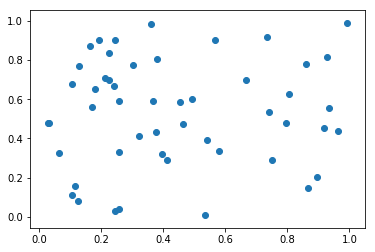

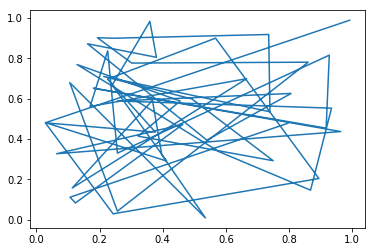

In [54]:
import matplotlib.pyplot as plt

N = 50
x = np.random.rand(N)
y = np.random.rand(N)

plt.scatter(x, y)
plt.show()
plt.plot(x, y)
plt.show()

In [43]:
import time as t

N=10000
nruns=5

a=[]
for i in range(N):
    a.append(np.zeros(1000))

print ("start")

b=[]
for i in range(nruns):
    s=t.time()
    c=np.vstack(a)
    b.append((t.time()-s))
print ("Timing version vstack ",np.mean(b))

b=[]
for i in range(nruns):
    s=t.time()
    c1=np.reshape(a,(N,1000))
    b.append((t.time()-s))

print ("Timing version reshape ",np.mean(b))

b=[]
for i in range(nruns):
    s=t.time()
    c2=np.concatenate(a,axis=0).reshape(-1,1000)
    b.append((t.time()-s))

print ("Timing version concatenate ",np.mean(b))

print (c.shape)
print (c2.shape)
assert (c==c2).all()
assert (c==c1).all()

start
Timing version vstack  0.09095644950866699
Timing version reshape  0.07380204200744629
Timing version concatenate  0.06981315612792968
(10000, 1000)
(10000, 1000)


In [52]:

m = np.matrix(np.random.random((2, 5)))
print(m)
x = m[0,:]
y = m[1,:]
print(x)
print(y)

[[0.12866604 0.09036738 0.01078995 0.6234402  0.91889223]
 [0.88728422 0.16804005 0.54890398 0.56016079 0.25068486]]
[[0.12866604 0.09036738 0.01078995 0.6234402  0.91889223]]
[[0.88728422 0.16804005 0.54890398 0.56016079 0.25068486]]


<function matplotlib.pyplot.show(*args, **kw)>

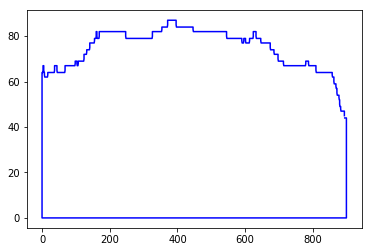

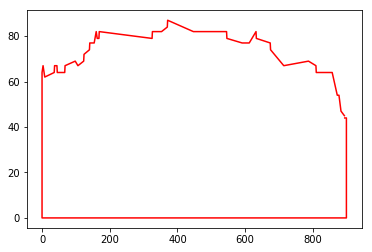

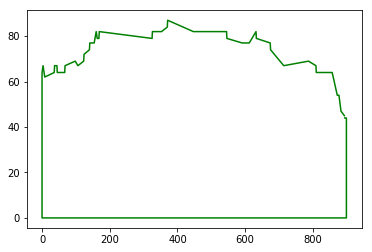

In [171]:
import json 
import numpy as np
import matplotlib.pyplot as plt
from simplification.cutil import simplify_coords, simplify_coords_vw

with open('deepak_test.json') as f:

    data = json.load(f)

size = 0
list_no = 0
size += len(data["anatomy"]["Bone"]["geometry"][list_no])

xy_array = np.zeros((1, size* 2))
index = 0


for j in range (len(data["anatomy"]["Bone"]["geometry"][list_no])):
        xy_array[0][index] = data["anatomy"]["Bone"]["geometry"][list_no][j]['x']
        index += 1
        xy_array[0][index] = data["anatomy"]["Bone"]["geometry"][list_no][j]['y']
        index += 1

rows = int(xy_array.size / 2)
collumns = 2

xy_array = xy_array.reshape(rows,collumns)

ratio = 0.5 #percentage of points to be included
count = 1 #counting no of iterations for both algorithms

max_num_points = ratio * len(xy_array)
if max_num_points:
                epsilon = 0.001
                simplified = simplify_coords(xy_array,epsilion)
                while len(simplified) > max_num_points:
                    epsilon *= 2
                    count += 1
                    simplified = simplify_coords(simplified, epsilon)

count = 1

max_num_points = ratio * len(xy_array)
if max_num_points:
                area = 0.001
                simplified_vw = simplify_coords_vw(xy_array,area)
                while len(simplified_vw) > max_num_points:
                    area *= 2
                    count += 1
                    simplified_vw = simplify_coords(simplified_vw, area)
                    

plt.figure(1)
plt.plot(xy_array[:,0], xy_array[:,1],"b")
plt.show

plt.figure(2)
plt.plot(simplified[:,0], simplified[:,1],"r")
plt.show

plt.figure(3)
plt.plot(simplified_vw[:,0], simplified_vw[:,1],"g")
plt.show

In [167]:
print(data["anatomy"]["Enamel"]["geometry"][])

IndexError: list index out of range